## Objectives

Perform exploratory data analysis using `pandas` and `matplotlib`

*   Exploratory Data Analysis
*   Preparing Data Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


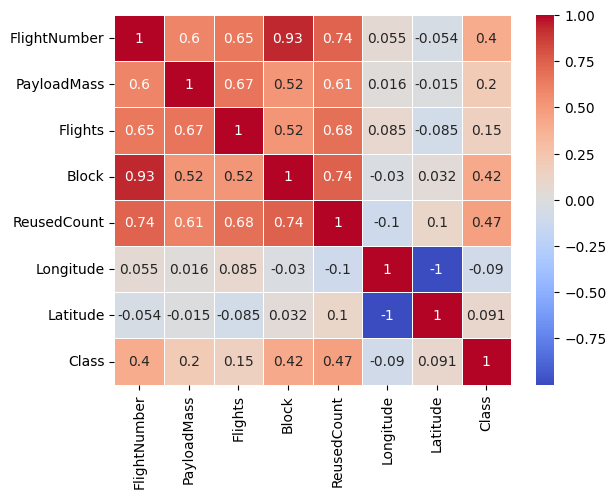

In [12]:
# @title Corelation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to datetime object if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.show()

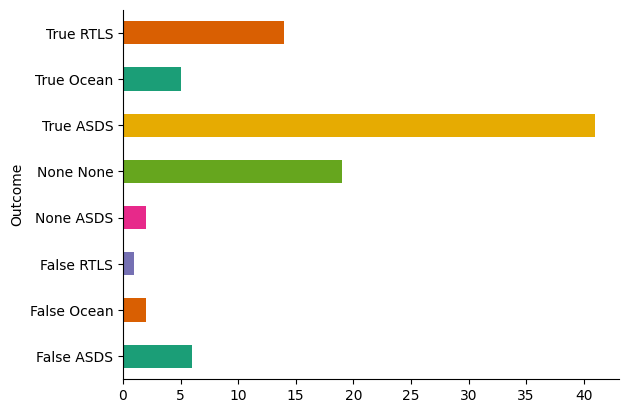

In [13]:
# @title Outcomes
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Outcome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

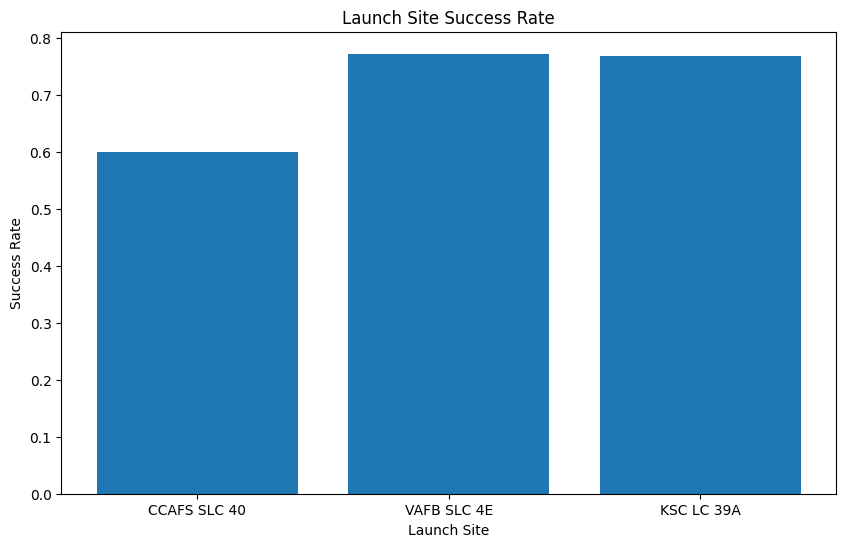

In [ ]:
# @title Launch Site Success Rate

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'
plt.figure(figsize=(10, 6))
plt.bar(df['LaunchSite'].unique(), df.groupby('LaunchSite')['Class'].mean())
plt.xlabel('Launch Site')
plt.ylabel('Success Rate')
_ = plt.title('Launch Site Success Rate')

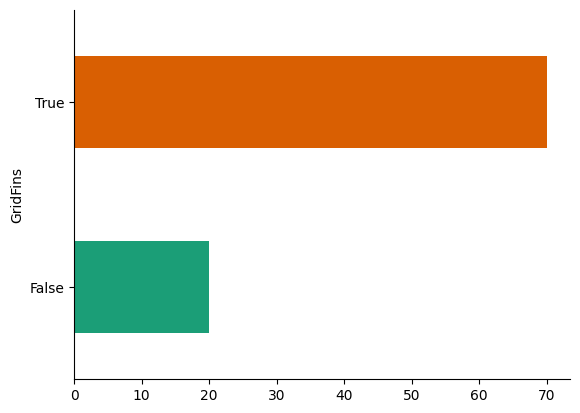

In [4]:
# @title GridFins

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('GridFins').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


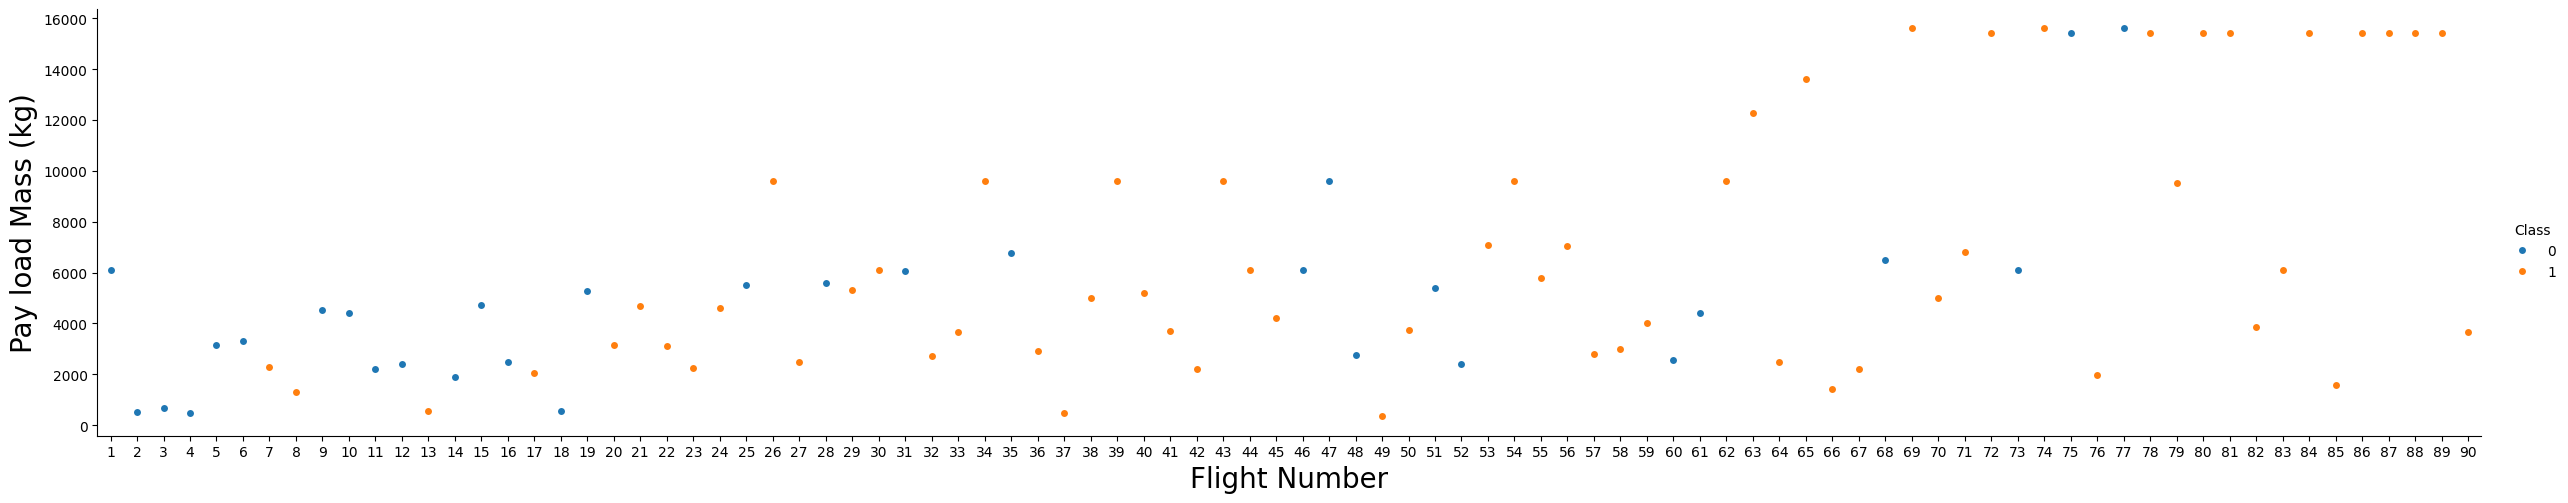

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


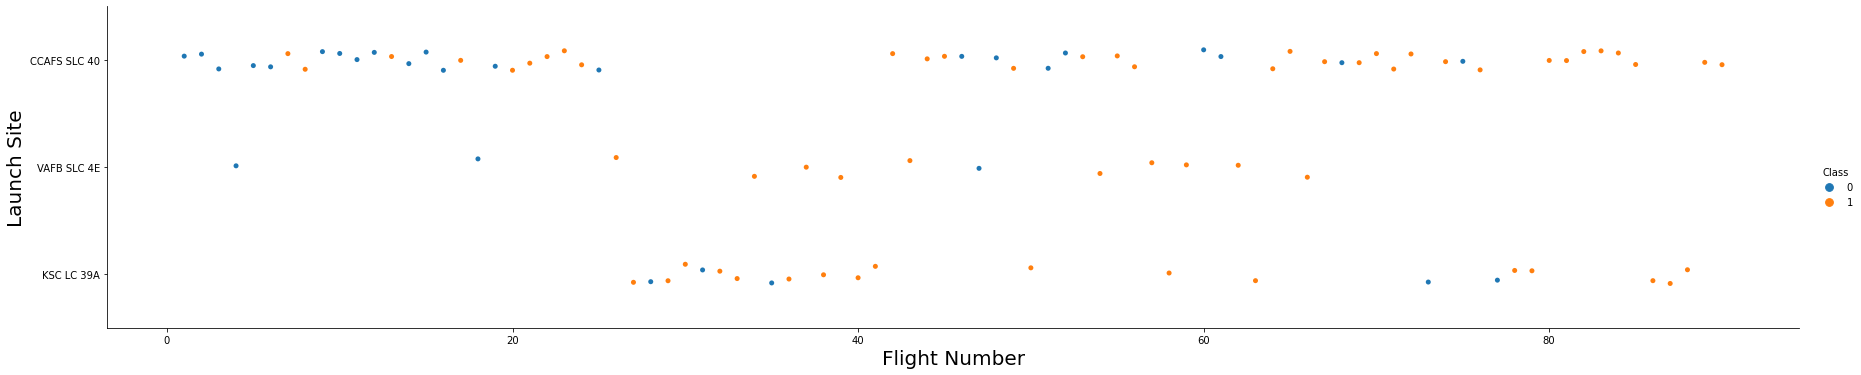

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


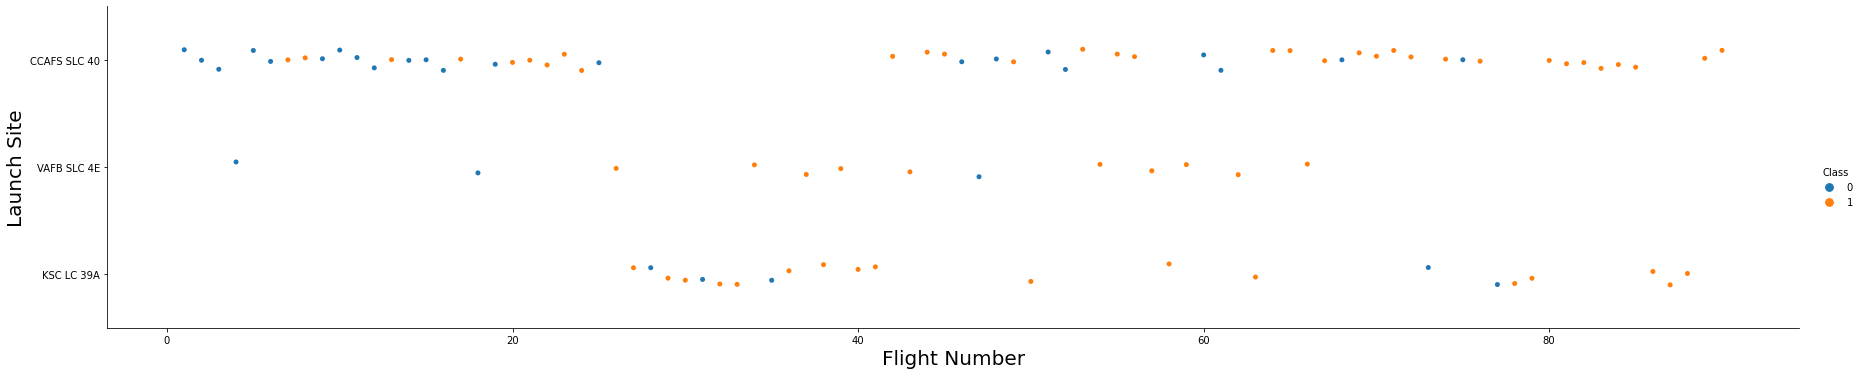

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# check head of dataframe
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# group df by Orbits and find the mean of Class column
df_groupby_orbits = df.groupby('Orbit').Class.mean()
df_groupby_orbits

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

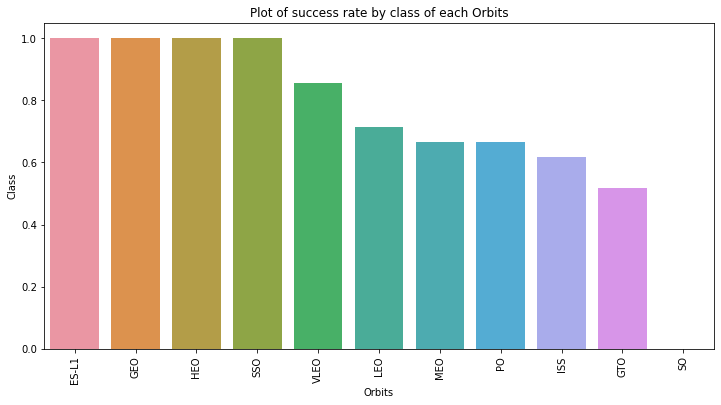

In [ ]:
# Use groupby method on Orbit column and get the mean of Class column
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

##### Analyze the ploted bar chart try to find which orbits have high success rate.

Looking at the plot, we can see that `ES-L1`, `GEO`, `HEO`, `SSO`, and `VLEO` are the Orbits that have high success rate. The `SO` has the least success rate amongst the orbits.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


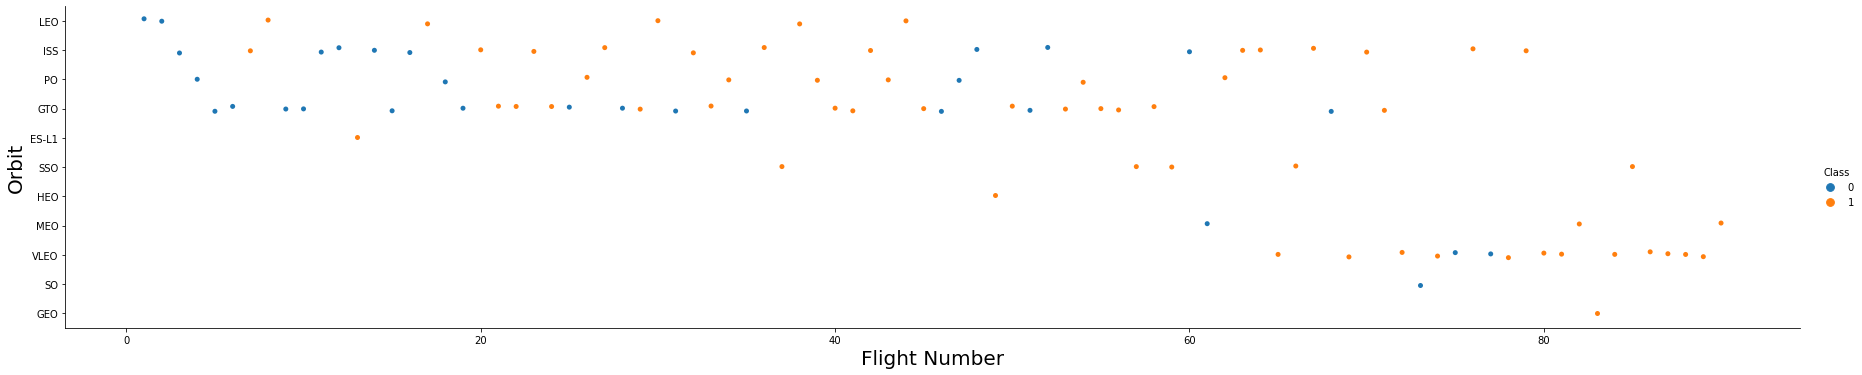

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


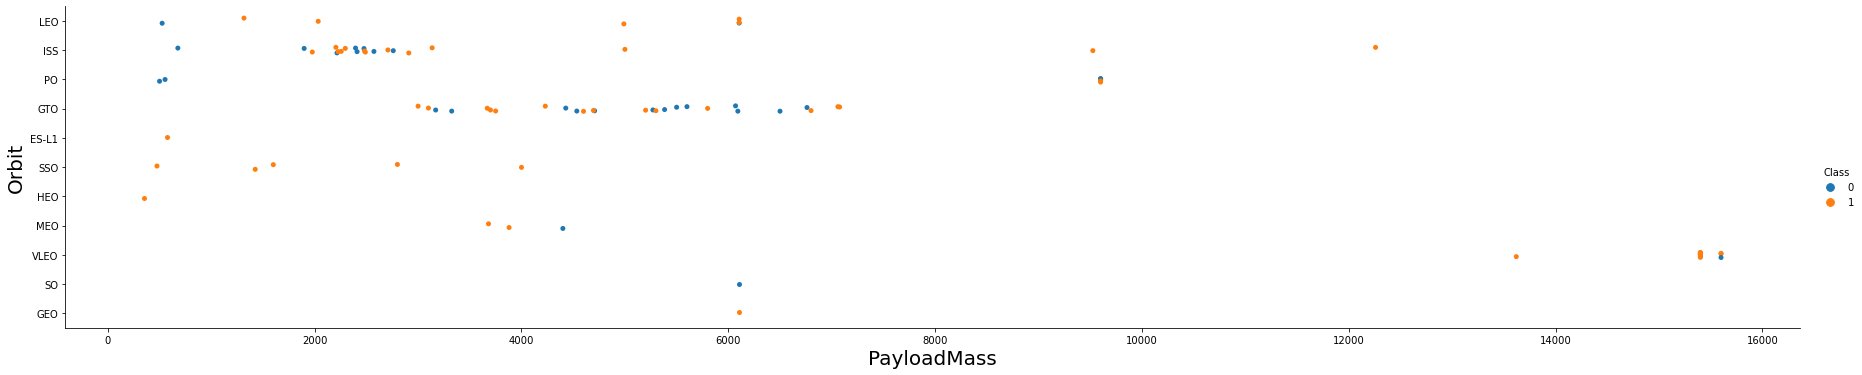

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


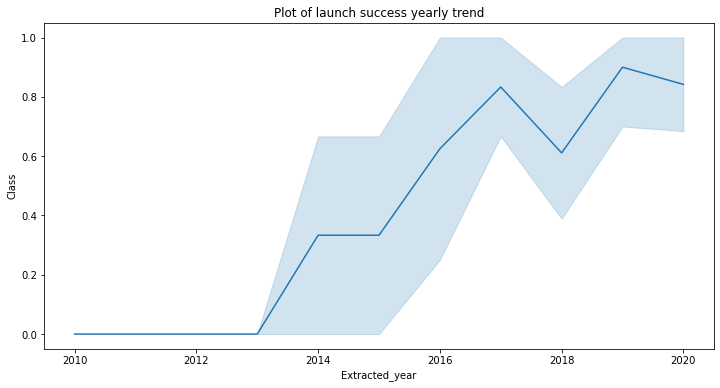

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_copy = df.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(df['Date']).year

# plot line chart
fig, ax=plt.subplots(figsize=(12,6))
sns.lineplot(data=df_copy, x='Extracted_year', y='Class')
plt.title('Plot of launch success yearly trend');
plt.show()

we can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, we should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
features = df[[ 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Legs', 'Block', 'ReusedCount', 'Longitude','Latitude']]
features.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude
0,6104.959412,LEO,CCAFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
1,525.000000,LEO,CCAFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
2,677.000000,ISS,CCAFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857
3,500.000000,PO,VAFB SLC 4E,1,False,False,1.0,0,-120.610829,34.632093
4,3170.000000,GTO,CCAFS SLC 40,1,False,False,1.0,0,-80.577366,28.561857


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. The result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, drop_first=True)
features_one_hot.head()

,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,6104.959412,1,False,False,1.0,0,-80.577366,28.561857,False,False,False,False,True,False,False,False,False,False,False,False
1,525.000000,1,False,False,1.0,0,-80.577366,28.561857,False,False,False,False,True,False,False,False,False,False,False,False
2,677.000000,1,False,False,1.0,0,-80.577366,28.561857,False,False,False,True,False,False,False,False,False,False,False,False
3,500.000000,1,False,False,1.0,0,-120.610829,34.632093,False,False,False,False,False,False,True,False,False,False,False,True
4,3170.000000,1,False,False,1.0,0,-80.577366,28.561857,False,True,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function
features_one_hot =  features_one_hot.astype(float)
features_one_hot

,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,6104.959412,1.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.000000,1.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,677.000000,1.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1.0,0.0,0.0,1.0,0.0,-120.610829,34.632093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3170.000000,1.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2.0,1.0,1.0,5.0,2.0,-80.603956,28.608058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
86,15400.000000,3.0,1.0,1.0,5.0,2.0,-80.603956,28.608058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
87,15400.000000,6.0,1.0,1.0,5.0,5.0,-80.603956,28.608058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
88,15400.000000,3.0,1.0,1.0,5.0,2.0,-80.577366,28.561857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# export csv
features_one_hot.to_csv('dataset_part_3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>
